}


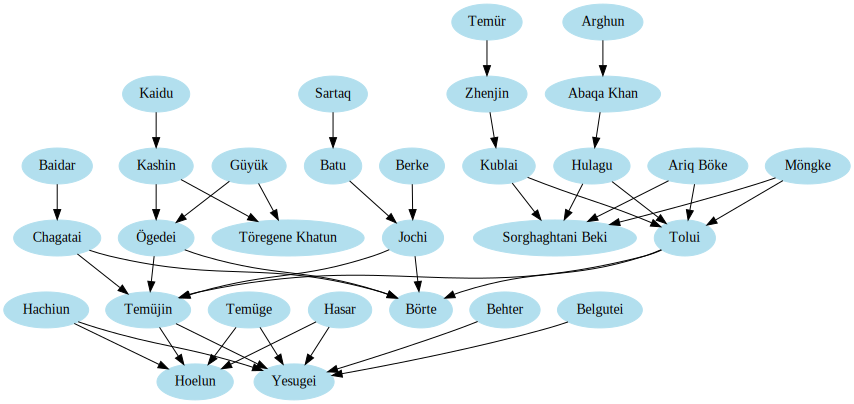

In [13]:
import pandas as pd
import sys
import io
import graphviz
from graphviz import Source
from networkx.drawing import nx_agraph
import pydot
from IPython.display import display
from IPython.display import Image

# instrukcja biblioteki graphviz
# https://graphviz.readthedocs.io/en/stable/manual.html

# wczytamy plik csv z linku raw z githuba
url = 'https://raw.githubusercontent.com/kalash34/WizualizacjaDanych/main/DrzewoGenealogiczne/Khan.csv'

df1 = pd.read_csv(url,on_bad_lines='skip')
df1.head()
df1['father_id'].dropna()
df1['mother_id'].dropna()

# licznik dla id dla pustych wezlow
counter = 1000

# Mapuje ludzi do ich posrednich wezlow relacji
relation = dict()

for index, rows in df1.iterrows():
  relation[rows['name']]=[]


# Plik CSV czytany jest dla nastepujacego wzoru kolumn:
# 
# 
# 1.  khan_id 2. name 3.  born 4.  died 5. father_id 6. mother_id


#zeby przekierowac wyjscie z printa do zmiennej tworzymy sobie obiekty sys
old_stdout = sys.stdout
new_stdout = io.StringIO()
sys.stdout = new_stdout


u = graphviz.Digraph('Drzewo_genealogiczne', filename='Family.gv',
                     node_attr={'color': 'lightblue2', 'style': 'filled'})

# https://graphviz.readthedocs.io/en/stable/examples.html


relations=set()

print("digraph G {")

# iterrows() - zwraca obiekt iteratora dla Data Frame
for index, row in df1.iterrows():
        id = row['khan_id']
        #relation[id] = counter
        #counter += 1
        name = str(row[1]) 
        parents = None
        partner = None
        u.node(name)
        if row['father_id'].isnumeric():
            father = int(row['father_id'])
            parents = relation[father]
            relation[row['name']].append(row['father_id'])
            relations.add((df1.loc[father, 'name'], name))
        if row['mother_id'].isnumeric():
            mother = int(row['mother_id'])
            parents = relation[mother]
            relation[row['name']].append(row['mother_id'])
            relations.add((df1.loc[mother, 'name'], name))
            
        '''
        # Imie:
        print("{}[label=\"{}\"];".format(id,name))
        # Relacje:
        if parents is not None:
            print("{} -> {};".format(id, parents))
        if partner is not None:
            print("{} -> {} [dir=none];".format(id, relation[partner]))
        '''
print("}")


edges=[]

for key, value in relation.items():
  for e in value:
    d2=df1[df1['khan_id']==int(e)]
    val = d2['name'].values[0]      #zamieniamy fragment df'a na tablice numpy, zeby otrzymac
    edges.append([key, val])
    
  

for edge in edges:
  u.edge(edge[0], edge[1])


# dla dokananego wpisu w konsoli pobieramy wartosc
output = new_stdout.getvalue()

# przywracamy standardowe wyjscie
sys.stdout = old_stdout


# string z grafem w jezyku dot
family_tree = output
#https://nbviewer.org/github/xflr6/graphviz/blob/master/examples/graphviz-notebook.ipynb
    
display(u)

